# Linear Regression With Multiple Variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## DataSet

In [2]:
housing = pd.read_csv("data/housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Preparation and Morning Data

In [3]:
housing.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

In [4]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
# If we observe the dataset, there are numeric values and columns with values as ‘Yes’ or ‘No.’ But to fit a regression line, 
# we need numeric values, so we’ll convert ‘Yes’ and ‘No’ as 1s and 0s

columns_has_values_yes_or_no = list(housing.columns) # [5:-3] + [[]]
columns_has_values_yes_or_no = columns_has_values_yes_or_no[5:-3] + [columns_has_values_yes_or_no[-2]]
print(columns_has_values_yes_or_no)

# Replace Values 'Yes' and 'NO' to 0s and 1s
housing[columns_has_values_yes_or_no] = housing[columns_has_values_yes_or_no].apply(lambda x: x.map({'yes': 1, 'no': 0}))

housing.head()

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [7]:
# The furnishingstatus column has three levels furnished, semi_furnished, and unfurnished.
# We need to convert this column into numerical as well. To do that, we’ll use dummy variables.

housing["furnishingstatus"].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [8]:
# Creating dummy variable
status = pd.get_dummies(housing['furnishingstatus'])

# Check what the dataset 'status' looks like
status.head()

# Adding the status to the original housing dataframe
housing = pd.concat([housing, status], axis=1)
housing.head()

# Dropping 'furnishingstatus' as we have created the dummies for it
housing = housing.drop(['furnishingstatus'], axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


## Data visualization

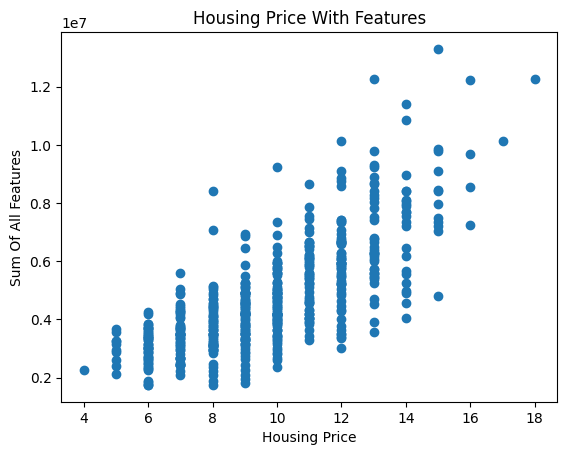

In [9]:
# housing.index

x = housing["price"]
y = housing.iloc[:, 2:].sum(axis=1)

plt.scatter(y, x)

plt.title("Housing Price With Features")
plt.xlabel("Housing Price")
plt.ylabel("Sum Of All Features")

plt.show()

## Splitting the Data into two Training and Testing

In [10]:
training_data = housing.sample(frac=0.8, random_state=25)
testing_data = housing.drop(training_data.index)

In [11]:
training_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,0,1,0
47,7490000,6600,3,1,4,1,0,0,0,1,3,1,1,0,0
444,3220000,3120,3,1,2,0,0,0,0,0,0,0,1,0,0
325,4007500,3460,4,1,2,1,0,0,0,1,0,0,0,1,0
382,3570000,3150,3,1,2,1,0,1,0,0,0,0,1,0,0


In [12]:
training_data.shape

(436, 15)

In [13]:
testing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,0,1,0
14,9240000,7800,3,2,2,1,0,0,0,0,0,1,0,1,0
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,1,0,0
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,1,0,0


In [14]:
testing_data.shape

(109, 15)

In [15]:
x_train = training_data.iloc[:, 2:]
x_test = testing_data.iloc[:, 2:]

In [16]:
x_train.head()

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
6,4,3,4,1,0,0,0,1,2,1,0,1,0
47,3,1,4,1,0,0,0,1,3,1,1,0,0
444,3,1,2,0,0,0,0,0,0,0,1,0,0
325,4,1,2,1,0,0,0,1,0,0,0,1,0
382,3,1,2,1,0,1,0,0,0,0,1,0,0


In [17]:
x_test.head()

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
2,3,2,2,1,0,1,0,0,2,1,0,1,0
5,3,3,1,1,0,1,0,1,2,1,0,1,0
14,3,2,2,1,0,0,0,0,0,1,0,1,0
17,3,2,4,1,0,0,0,1,2,0,1,0,0
22,3,1,1,1,1,1,0,1,1,0,1,0,0


In [18]:
y_train = training_data["price"]
y_test = testing_data["price"]

In [19]:
y_train.head()

6      10150000
47      7490000
444     3220000
325     4007500
382     3570000
Name: price, dtype: int64

In [20]:
y_test.head()

2     12250000
5     10850000
14     9240000
17     8960000
22     8645000
Name: price, dtype: int64

## Building The Model

In [23]:
class LinearRegression:
    
    def __init__(self, x_train, y_train, learning_rate=0.0005, iteration=1000000):
        self.learning_rate = learning_rate 
        self.iteration = iteration
        self.x_train = x_train
        self.y_train = y_train
        self.theta = None # np.zeros(self.x_train.shape[0], 1)) # theta is array n, x
        self.m = None # y_train.size # m is size of all data
         
        
    def fit(self):
        theta_list = []
        cost_list = []
        
        x = np.vstack((np.ones(self.x_train.shape[0]), self.x_train.T)).T # add one column one value 
        y = self.y_train.to_numpy().reshape(self.y_train.shape[0], 1) # reshape for 2, 1
        
        self.theta = np.zeros((x.shape[1], 1))
        self.m = y.size
        
        for _ in range(self.iteration):
            
            
            y_pred = np.dot(x, self.theta)
            
            
            cost = ((1 / (2 * self.m)) *( np.sum(np.square(y_pred - y))))
            
            
            d_theta = (1 / self.m) * np.dot(x.T, y_pred - y)
            
            
            self.theta = self.theta - self.learning_rate * d_theta
            
            theta_list.append(self.theta)
            cost_list.append(cost)
            
            if (_%(self.iteration/10) == 0):
                print(f"Cost is: {cost}")
            
        return self.theta, theta_list, cost_list
            
        
    def predict(self, x):
        x = np.vstack((np.ones(x.shape[0]), x.T)).T
        predict_x = [self._predict(x_test) for x_test in x]
        return np.array(predict_x)
    
    def _predict(self, x):
        return np.dot(x, self.theta)
    
    def error(self, y_true, y_pred, x_test):
        return (1 / x_test.shape[0]) * (np.sum(np.abs(y_pred - y_true)))

## Run Model

In [24]:
model = LinearRegression(x_train, y_train)

theta, theta_list, cost_list = model.fit()

# print(f"Theta: {theta}\n")
# print(f"Theta List:\n{theta_list}\n")
# print(f"Cost List:\n{cost_list}\n")

Cost is: 13008095357200.23
Cost is: 606294798835.9313
Cost is: 605954857992.7417
Cost is: 605950339239.8474
Cost is: 605950278698.5651
Cost is: 605950277881.4333
Cost is: 605950277870.3278
Cost is: 605950277870.176
Cost is: 605950277870.1738
Cost is: 605950277870.1738


In [25]:
print(cost_list[0])
print(cost_list[-1])
print(cost_list[0] - cost_list[-1])

13008095357200.23
605950277870.1738
12402145079330.057


In [26]:
predictions = model.predict(x_test)
# print(predictions)

In [27]:
y_true = y_test.to_numpy().reshape(y_test.size, 1)


error = model.error(y_true, predictions, x_test)
print("error:", error*100)

error: 95169420.9531576


## Cost Function

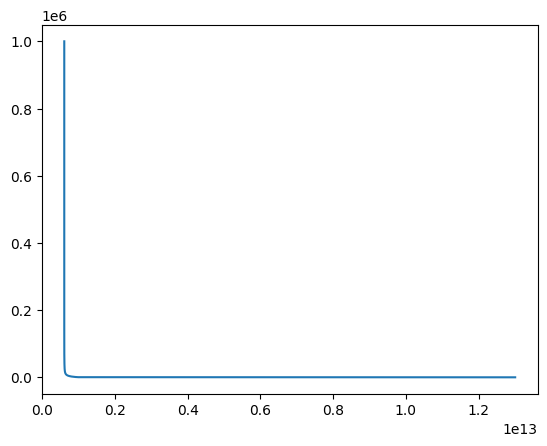

In [28]:
indexs_x = np.arange(0, 1000000) # LinearRegression.iteration
plt.style.use("default")
plt.plot(cost_list, indexs_x)
plt.show()